
## Project: Investigate a Dataset - [TMDB MOVIE DATA SET]
### Table of Contents
- [Introduction]() 
- [DataWrangling]() 
- [Exploratory Data Analysis]() 
- [Conclusions]()

## INTRODUCTION
### RESEARCH QUESTIONS
1.Which are the most produced genres?

2.Are the most produced genres also the most profitable ones?

3.Which month is the best one to release movies ?
                                                                                                                                 
                                                                                                                              

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [ ]:
!pip install --upgrade pandas==0.25.0


In [2]:
def wrangle(filepath):
    #read csv file into dataframe
    df=pd.read_csv(filepath)
    #dropping the columns that have null values and the ones i will not need
    df.drop(columns=["tagline","keywords","homepage","cast","director","overview","imdb_id","production_companies"], inplace= True)
    
    #removing duplicates
    df.drop_duplicates(inplace=True)
    return df

In [3]:
df = wrangle("Downloads/tmdb-movies.csv")
print("df shape:", df.shape)
df.head()

df shape: (10865, 13)


,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#checking for nal values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   budget          10865 non-null  int64  
 3   revenue         10865 non-null  int64  
 4   original_title  10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


### DATA CLEANING


In [5]:
df.isna().sum()#checking for null values

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [6]:
df.duplicated().value_counts()#checking the duplicated

False    10865
dtype: int64

## Exploratory Data Analysis
### Research Question 1 (Which are the most produced genres?)

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df['genres'].nunique()#checking how many genres are in this data

2039

In [9]:
top_15_genres=df['genres'].value_counts().head(15)
top_15_genres
#plotting the top 15 genres by its count

Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Comedy|Family           102
Action|Thriller         101
Thriller                 93
Drama|Comedy             92
Animation|Family         90
Name: genres, dtype: int64

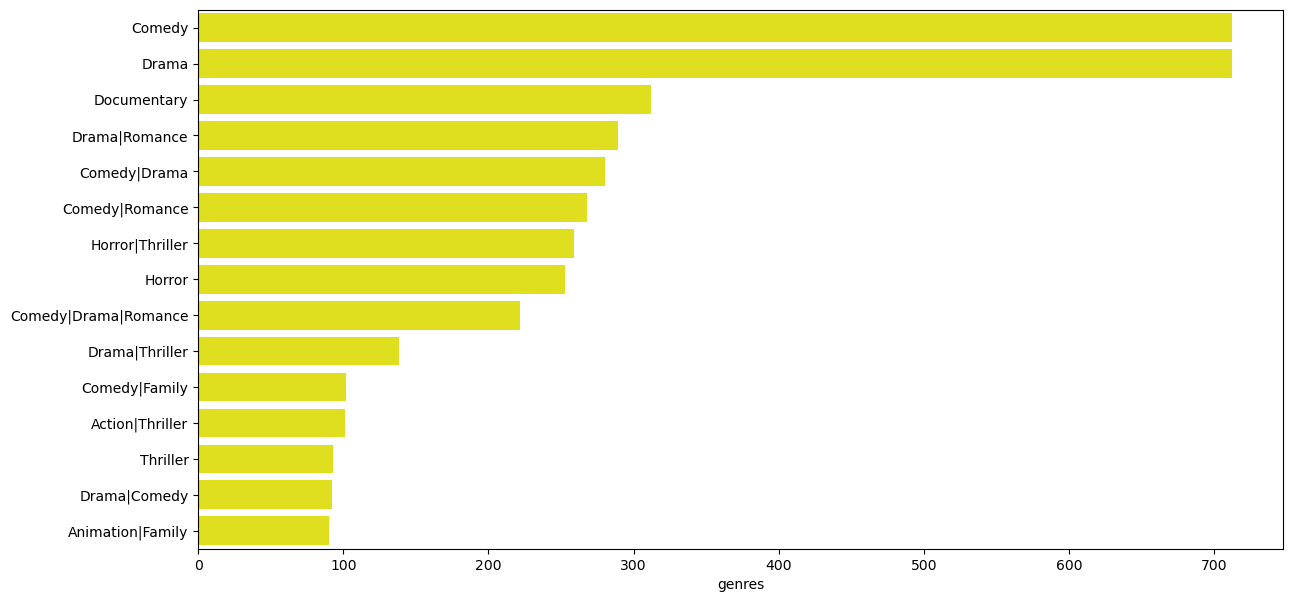

In [10]:
plt.figure(figsize=(14,7))
sns.barplot(x = top_15_genres, y=top_15_genres.index , color="yellow");

### RESEARCH QUESTION TWO(Are the most produced genres also the most profitable ones?)

In [11]:
#adding the profit column by calculating the net profit
df['profit']=df['revenue']-df['budget']


In [12]:
#grouping  genres and getting the specific columns i need
profit_df=df.groupby('genres',as_index=False)[['budget','revenue','profit']].mean().sort_values(by='profit',
                                                                                                      ascending=False)

In [13]:
top_10_profit_df = profit_df.head(10)
top_10_profit_df

,genres,budget,revenue,profit
922,Crime|Drama|Mystery|Thriller|Action,22000000.0,1.106280e+09,1.084280e+09
114,Action|Adventure|Science Fiction|Fantasy,100000000.0,1.034089e+09,9.340891e+08
1303,Family|Fantasy|Adventure,200000000.0,1.025467e+09,8.254671e+08
550,Adventure|Fantasy|Family|Mystery,150000000.0,9.382127e+08,7.882127e+08
1751,Science Fiction|Adventure|Family|Fantasy,10500000.0,7.929106e+08,7.824106e+08
1286,Family|Animation|Drama,45000000.0,7.882418e+08,7.432418e+08
1793,Science Fiction|Thriller|Action|Adventure,130000000.0,8.474235e+08,7.174235e+08
355,Action|Thriller|Science Fiction|Mystery|Adventure,160000000.0,8.255000e+08,6.655000e+08
1754,Science Fiction|Adventure|Thriller,125000000.0,7.521002e+08,6.271002e+08
1752,Science Fiction|Adventure|Fantasy,75000000.0,6.912107e+08,6.162107e+08


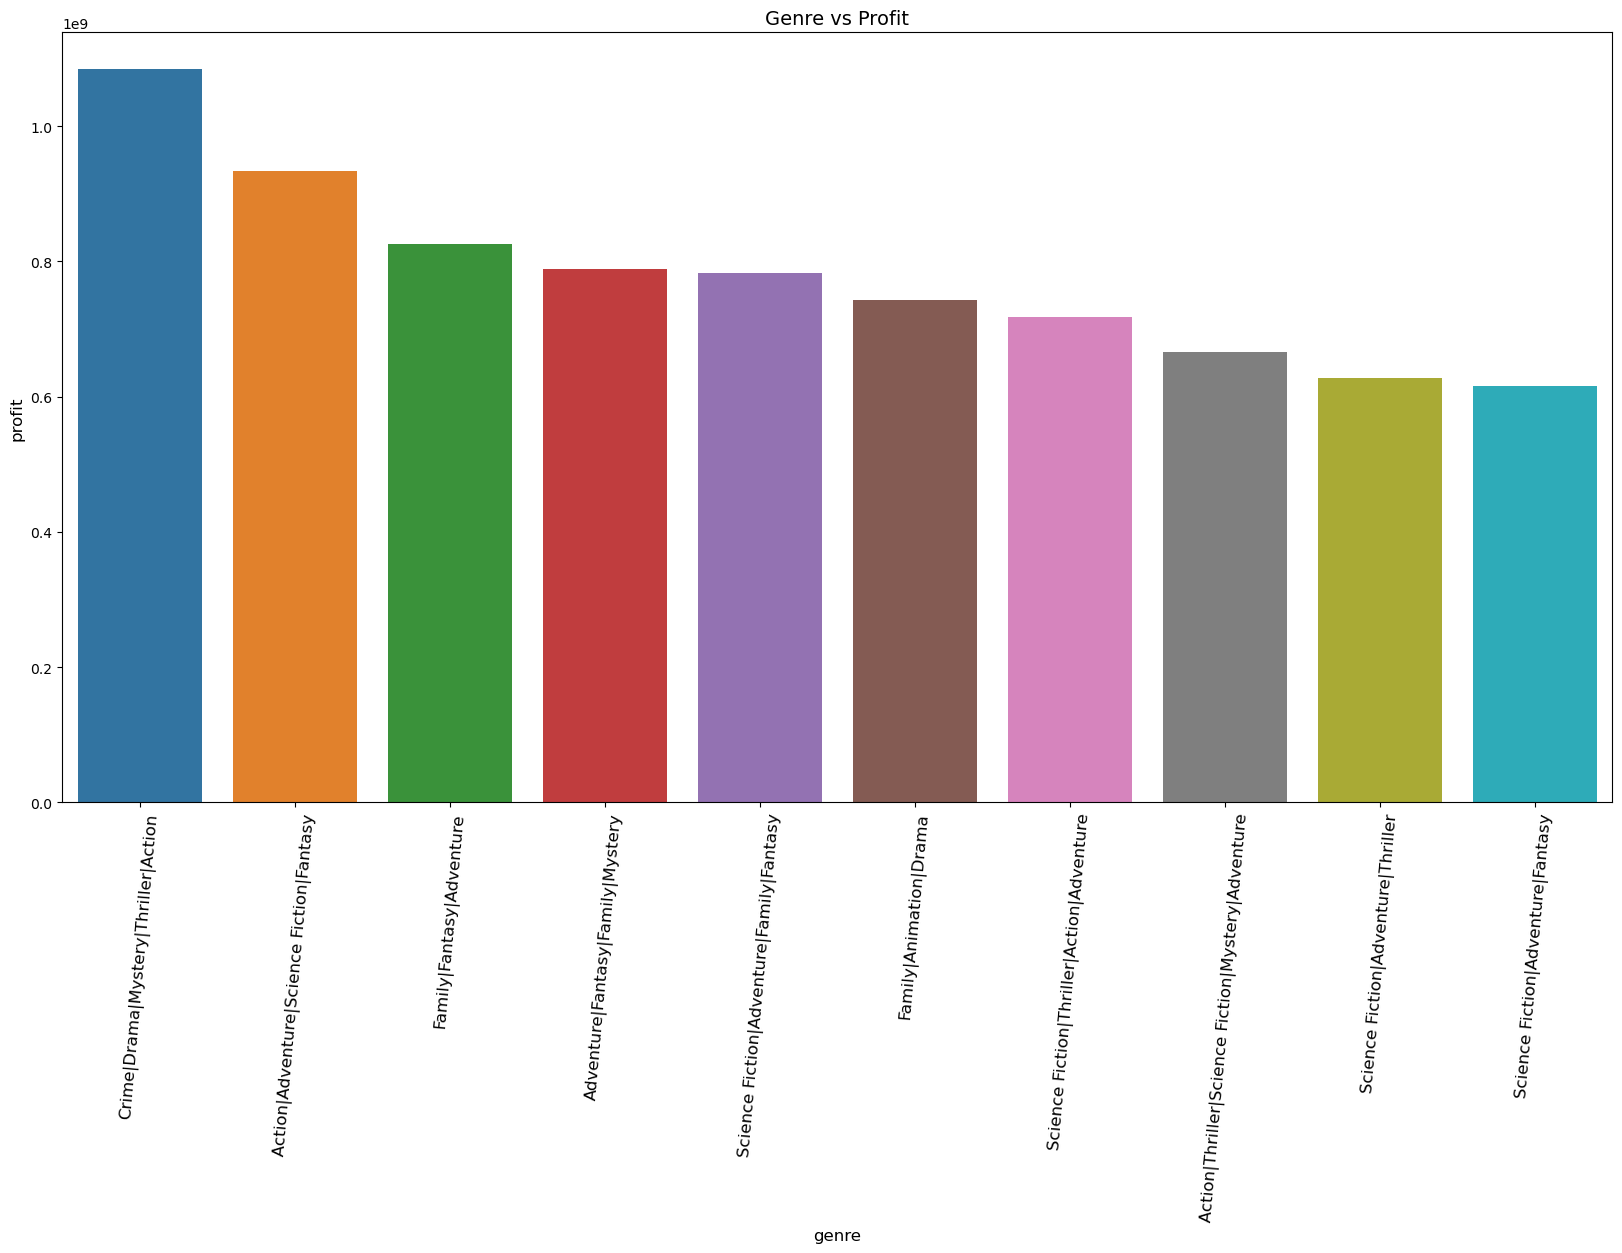

In [14]:
# bar graph of genre vs profit
plt.figure(figsize=(20,10))
ax=sns.barplot(x=top_10_profit_df['genres'], y=top_10_profit_df['profit'])
plt.ylabel('profit',fontsize=12)
plt.xlabel('genre',fontsize=12)
plt.title('Genre vs Profit',fontsize=14)
plt.xticks(rotation=85,fontsize=12);


Indeed,drama related movies are more profitable

### RESEARCH QUESTION 3(What is the best month to produce movies)?

In [15]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [16]:
#changing the date format this column to type datetime
df['release_date']=pd.to_datetime(df['release_date'])


In [17]:
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [18]:
#showing only the month in the dates
months=[dates.strftime('%B') for dates in df['release_date']]


     

#creating a new column in the movie_df to show only the months I created in the cell above
df['month']=months


     

month_df=df.groupby('month',as_index=False)['profit'].mean()#grouping by month and getting the profit
month_df

,month,profit
0,April,1.986922e+07
1,August,1.566722e+07
2,December,3.931195e+07
3,February,1.523901e+07
4,January,7.299410e+06
5,July,3.765463e+07
6,June,5.279089e+07
7,March,2.346622e+07
8,May,4.257437e+07
9,November,3.752400e+07


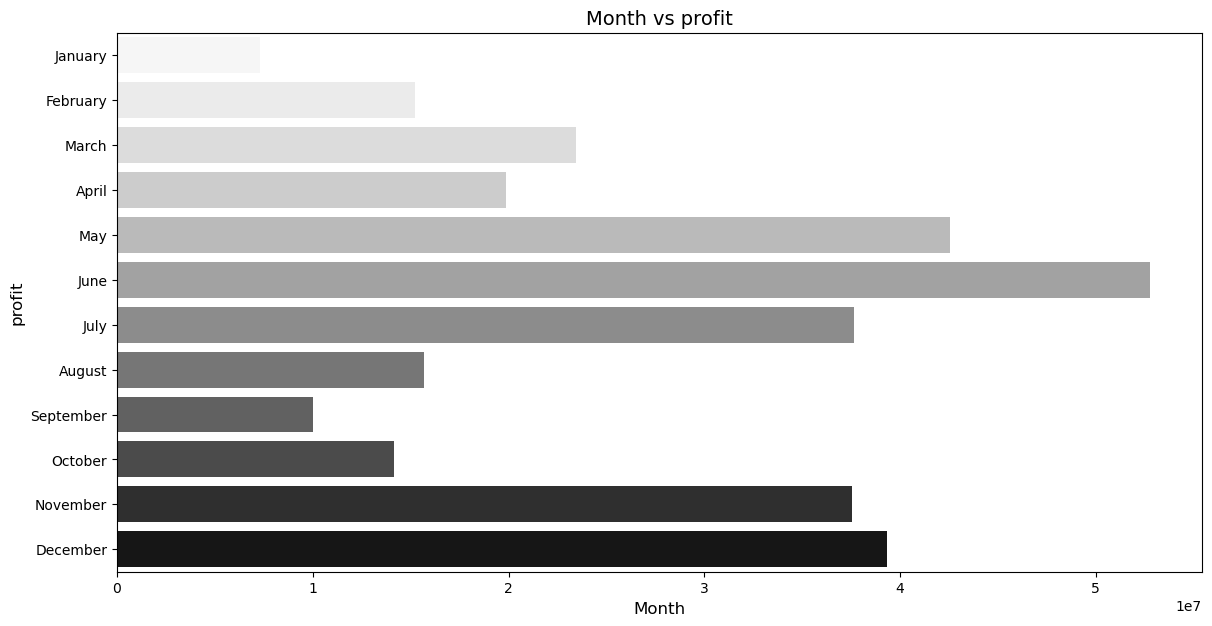

In [19]:
#plottting month vs budget
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_df['month'], x=month_df['profit'],palette='Greys',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])#ordering the months
plt.xlabel('Month',fontsize=12)
plt.ylabel('profit',fontsize=12)
plt.title('Month vs profit',fontsize=14);


The months December,June,May are the best to release movies since they give the most profit

### CONCLUSIONS

Producing movies in the Month of May, June,July,November,December has the most profit so releasing movies on these months guarantee high returns.

Producing drama related movies with comedy,Action,mystery and adventure because apart from being the most produced genres,they are also very profitable.

### LIMITATIONS

The data set is not enough to provide concrete or enough conclusions on a business , There's abit much that can be analyzed to come up with more  solutions and recommendations.

